## Ejemplo 1: Operación de señales y Filtro de media móvil
### Mariana Noreña Vásquez
### CC 1000411870

## Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def grap_plots(x, y, title, xlabel, ylabel, pos, sub=True, fig=(10,10)):
    plt.figure(figsize=fig)
    if sub:
        for i in range(0,len(title)):
            plt.subplot(pos[i][0],pos[i][1],pos[i][2])
            plt.stem(x,y[i])
            plt.title(title[i], fontsize=20)
            plt.xlabel(xlabel, fontsize=18)
            plt.ylabel(ylabel, fontsize=18)
            plt.grid()

## Suma

La operación de suma se hace muestra a muestra recorriendo toda la señal

In [3]:
x = []
y = []
z = []
nums = 10
n = np.arange(0,nums,1)
for i in range(nums):
    m = random.randint(0,10)
    b = random.randint(0,10)
    x.append(m)
    y.append(b)
    z.append(m+b)

C:\Users\mari1\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


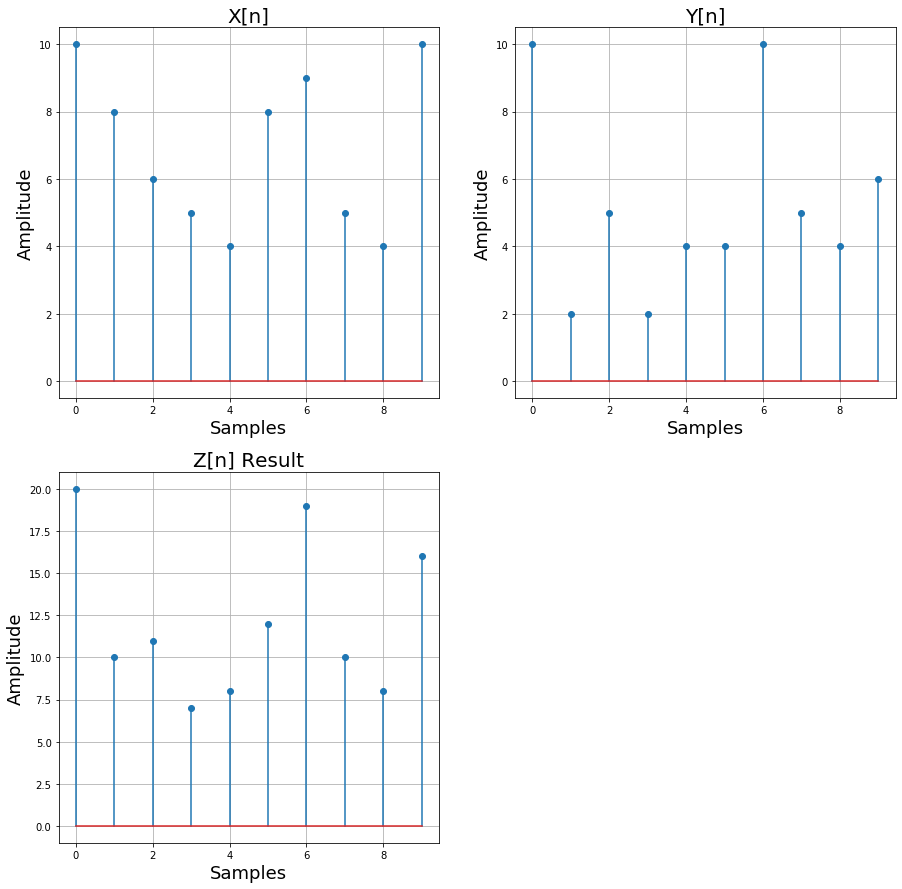

In [4]:
titles = ["X[n]","Y[n]","Z[n] Result"]
pos = [(2,2,1),(2,2,2),(2,2,3)]
y_axis = [x,y,z]

grap_plots(n, y_axis, titles, 'Samples', 'Amplitude', pos, fig=(15,15))

## Desplazamiento Señal Aperiódica

La secuencia es finita antes y después de desplazarla, ya sea que la señal sea o no aperiódica.

C:\Users\mari1\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\mari1\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0, 0.5, 'Amplitude')

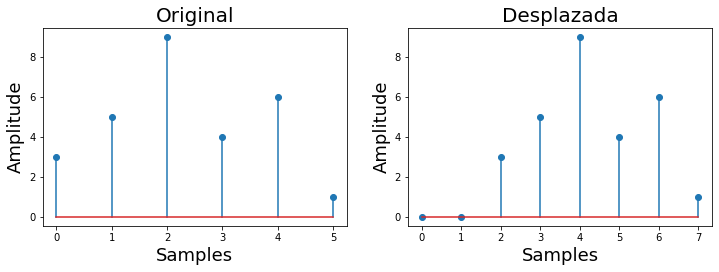

In [5]:
xn = [3,5,9,4,6,1]
n = np.arange(0, len(xn), 1)

xn2 = []
num = 2 

for d in range(0,len(xn)+num):
    if d < num:
        xn2.append(0) #Se agregan cero 
    else:
        xn2.append(xn[d-num])
        
n2 = np.arange(0, len(xn)+num, 1)
        
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.stem(n,xn)
plt.title('Original', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)


plt.subplot(2,2,2)
plt.stem(n2,xn2)
plt.title('Desplazada', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

## Filtro de Media Móvil de n puntos

Consiste en sacar el promedio entre los **n** puntos que se están teniendo en cuenta, es decir, la media entre la muestra actual y las **n-1** anteriores a ella.

In [6]:
def filtroMM(x, n_prom):
    z = []
    suma = 0
    for i in range(0,len(x)+3):
        for m in range(0, n_prom):
            if (i-m < 0) or (i-m > len(x)-1):
                suma += 0
            else:
                suma += x[i-m]
              
        
        prom = float(suma/n_prom) #Promedio
        z.append(prom)
        suma = 0
        
    return z

In [7]:
num = 3 #Puntos a tener en cuenta para el filtro
x = []
for m in range(10):
    x.append(random.randint(0,10))

In [8]:
fmm = filtroMM(x,num)

C:\Users\mari1\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\mari1\Anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


Text(0, 0.5, 'Amplitude')

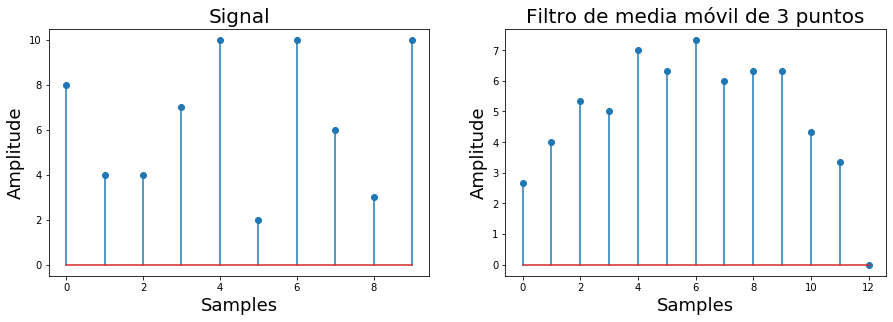

In [9]:
n1 = np.arange(0,len(x),1)
n2 = np.arange(0,len(fmm),1)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.stem(n1,x)
plt.title('Signal', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

plt.subplot(2,2,2)
plt.stem(n2,fmm)
plt.title(f'Filtro de media móvil de {num} puntos', fontsize=20)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
